CIFAR10 Image Classification

Designed and implemented a convolutional neural network for the CIFAR10 image classification task aiming to achieve a high test accuracy. Evaluated the classification accuracy by reporting top-1 and top-5 test error rates.

In [2]:
# libraries
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### Overview:
I will be using ResNet50 because it is pre-trained on millions of images. ResNet50 is a 50-layer deep model and it uses residual connections which will avoid the vanishing gradient problem. ResNet50 has already learned image features from ImageNet, so we will utilize that and make some changes so that it can classify CIFAR-10 images. I will be creating 3 different models to see which one has the highest test accuracy.


In [3]:
# loading the data:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# normalizing:
x_train, x_test = x_train / 255.0, x_test / 255.0

# converting labels to categorical (one-hot encoding):
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


### Model 1:
Since we are using a pre-trained model, we need to freeze some of the convolutional layers, which will ensure that only the custom layers we add are trained.

In [4]:
# loading ResNet50:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3)) # excluding the fully connected (top) layers

# freeze base model layers to keep the pre-trained features:
for layer in base_model.layers:
    layer.trainable = False

# new fully connected layers
x = GlobalAveragePooling2D()(base_model.output)  # convert feature maps to vector: better feature extraction
x = Dense(512, activation='relu')(x) # add layer for feature extraction
x = Dropout(0.5)(x)  # dropout to reduce overfitting
x = Dense(10, activation='softmax')(x)  # 10 classes for CIFAR-10

model_1 = Model(inputs=base_model.input, outputs=x)

# compile the model
model_1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top_5_acc")])

model_1.summary()

# traing:
history_1 = model_1.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,641,930 (94.00 MB)

 Trainable params: 1,054,218 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.1506 - loss: 2.5146 - top_5_acc: 0.6040 - val_accuracy: 0.2708 - val_loss: 2.0754 - val_top_5_acc: 0.7925
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.2412 - loss: 2.0881 - top_5_acc: 0.7538 - val_accuracy: 0.3011 - val_loss: 1.9814 - val_top_5_acc: 0.8048
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.2673 - loss: 2.0146 - top_5_acc: 0.7883 - val_accuracy: 0.2970 - val_loss: 1.9345 - val_top_5_acc: 0.8162
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.2888 - loss: 1.9656 - top_5_acc: 0.8014 - val_accuracy: 0.3298 - val_loss: 1.8888 - val_top_5_acc: 0.8394
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3034 - loss: 1.9300 - top_5_acc: 0.8142 - val_accuracy: 0.3396 - val_loss: 1.8600 - val_top_5_acc: 0.8419
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3116 - loss: 1.9068 - top_5_acc: 0.8192 - val_accuracy: 0.3352 - 

Now we will look at the plots of the average loss, top-1 error rate and top-5 error rate per epoch versus the number of epochs for the training and the test dataset

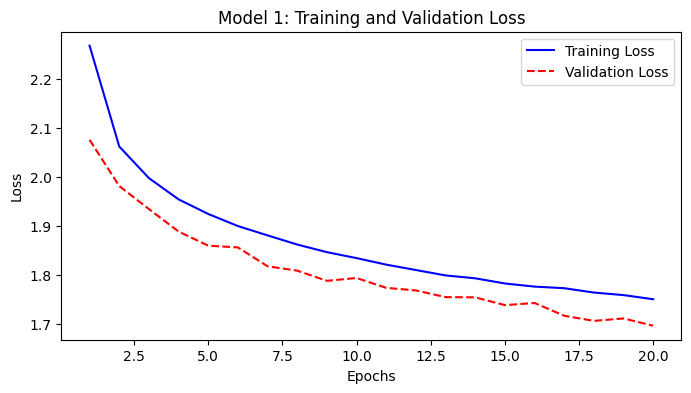

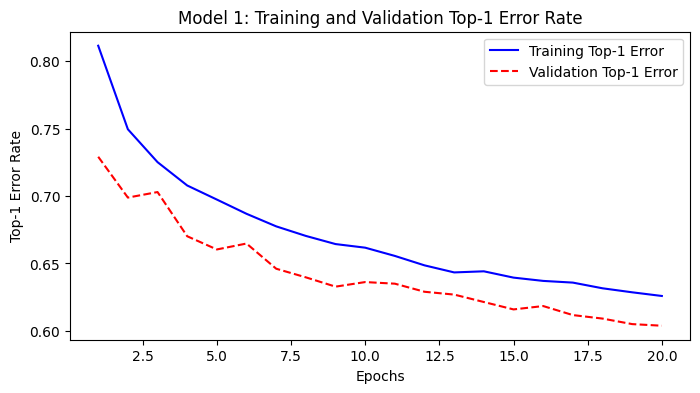

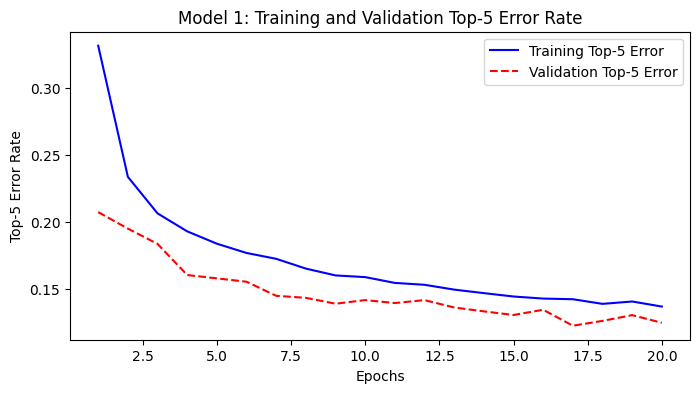

In [5]:
model_name = "Model 1"
epochs = 20
epoch_range = range(1, epochs + 1)

# converting accuracy to error rates:
train_top1_err_1 = [1 - acc for acc in history_1.history['accuracy']]
val_top1_err_1 = [1 - acc for acc in history_1.history['val_accuracy']]
train_top5_err_1 = [1 - acc if acc is not None else 1 for acc in history_1.history.get('top_5_acc', [None] * epochs)]
val_top5_err_1 = [1 - acc if acc is not None else 1 for acc in history_1.history.get('val_top_5_acc', [None] * epochs)]

# training and validation loss:
plt.figure(figsize=(8, 4))
plt.plot(epoch_range, history_1.history['loss'], 'b', label="Training Loss")
plt.plot(epoch_range, history_1.history['val_loss'], 'r', linestyle='dashed', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f"{model_name}: Training and Validation Loss")
plt.show()

# training and validation top-1 error rate:
plt.figure(figsize=(8, 4))
plt.plot(epoch_range, train_top1_err_1, 'b', label="Training Top-1 Error")
plt.plot(epoch_range, val_top1_err_1, 'r', linestyle='dashed', label="Validation Top-1 Error")
plt.xlabel("Epochs")
plt.ylabel("Top-1 Error Rate")
plt.legend()
plt.title(f"{model_name}: Training and Validation Top-1 Error Rate")
plt.show()

# training & validation top-5 error rate:
if any(train_top5_err_1) and any(val_top5_err_1):
    plt.figure(figsize=(8, 4))
    plt.plot(epoch_range, train_top5_err_1, 'b', label="Training Top-5 Error")
    plt.plot(epoch_range, val_top5_err_1, 'r', linestyle='dashed', label="Validation Top-5 Error")
    plt.xlabel("Epochs")
    plt.ylabel("Top-5 Error Rate")
    plt.legend()
    plt.title(f"{model_name}: Training and Validation Top-5 Error Rate")
    plt.show()

Both training and validation loss are decreasing (which is good). I beleive that this loss can still be improved with fine-tuning. The top-1 error rate is decreasing, meaning the model is making fewer mistakes and predicting the correctly. Top-5 error rate is decreasing as well, meaning that the model is predicting the correct class within its top-5 choices more frequently. We will now look to increase the test accuracy more.

### Model 2:
Now to compare, instead of freezing all the ResNet50 layers, we will freeze most of the them but unfreeze the last 10. In ResNet50, earlier layers are for detecting general patterns (edgeges, colors, etc). The last couple of layers are more data-set specific. This can allow for the higher-level features to be fine-tuned, which can prevent overfitting. We will also compile the model with a lower learning rate because this method requires smaller updates:

In [6]:
# model 2:
base_model_2 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# freezing all ResNet50 layers at first:
for layer in base_model_2.layers:
  layer.trainable = False

# unfreezing only the last 10 layers:
for layer in base_model_2.layers[-10:]:
    layer.trainable = True

# add new layers:
x = GlobalAveragePooling2D()(base_model_2.output)  # reduce dimensionality
x = Dense(512, activation='relu')(x)  # fully connected layer
x = Dropout(0.5)(x)  # dropout to prevent overfitting
x = Dense(10, activation='softmax')(x)

model_2 = Model(inputs=base_model_2.input, outputs=x)

model_2.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy',  metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top_5_acc")])
model_2.summary()

history_2 = model_2.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,641,930 (94.00 MB)

 Trainable params: 5,519,882 (21.06 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - accuracy: 0.1286 - loss: 3.2519 - top_5_acc: 0.5619 - val_accuracy: 0.3114 - val_loss: 1.9582 - val_top_5_acc: 0.8081
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2514 - loss: 2.1637 - top_5_acc: 0.7366 - val_accuracy: 0.3578 - val_loss: 1.8452 - val_top_5_acc: 0.8400
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.3195 - loss: 1.9158 - top_5_acc: 0.8092 - val_accuracy: 0.3693 - val_loss: 1.7865 - val_top_5_acc: 0.8513
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.3595 - loss: 1.8132 - top_5_acc: 0.8403 - val_accuracy: 0.3969 - val_loss: 1.7166 - val_top_5_acc: 0.8647
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.3869 - loss: 1.7358 - top_5_acc: 0.8589 - val_accuracy: 0.4088 - val_loss: 1.6787 - val_top_5_acc: 0.8716
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.4033 - loss: 1.6846 - top_5_acc: 0.8699 - val_accuracy: 0.4136

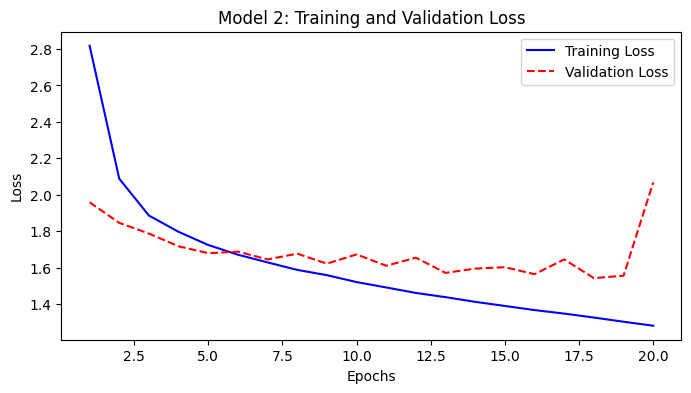

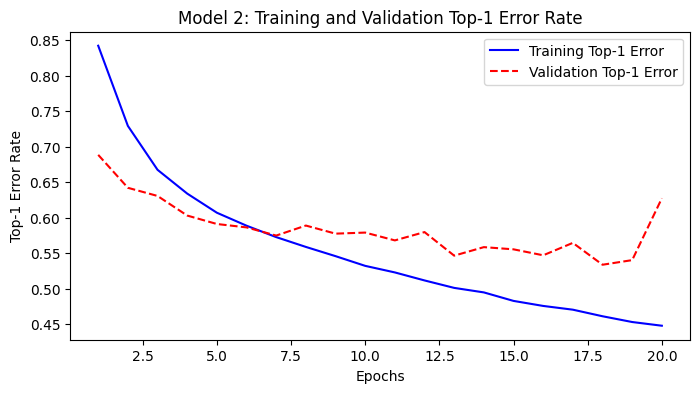

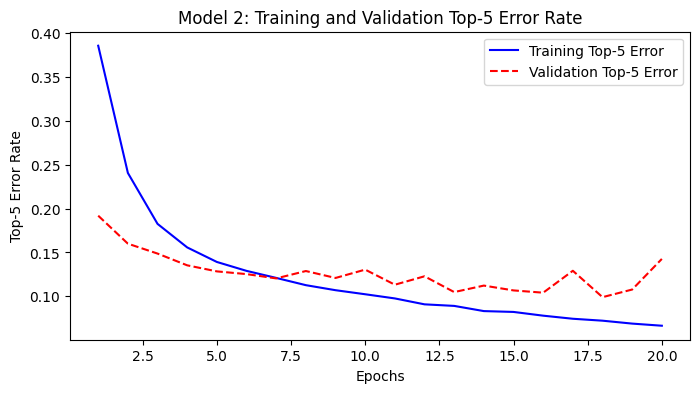

In [7]:
model_name = "Model 2"
epochs = 20
epoch_range = range(1, epochs + 1)

# converting accuracy to error rates:
train_top1_err_2 = [1 - acc for acc in history_2.history['accuracy']]
val_top1_err_2 = [1 - acc for acc in history_2.history['val_accuracy']]
train_top5_err_2 = [1 - acc if acc is not None else 1 for acc in history_2.history.get('top_5_acc', [None] * epochs)]
val_top5_err_2 = [1 - acc if acc is not None else 1 for acc in history_2.history.get('val_top_5_acc', [None] * epochs)]

# training and validation loss:
plt.figure(figsize=(8, 4))
plt.plot(epoch_range, history_2.history['loss'], 'b', label="Training Loss")
plt.plot(epoch_range, history_2.history['val_loss'], 'r', linestyle='dashed', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f"{model_name}: Training and Validation Loss")
plt.show()

# training and validation top-1 error rate:
plt.figure(figsize=(8, 4))
plt.plot(epoch_range, train_top1_err_2, 'b', label="Training Top-1 Error")
plt.plot(epoch_range, val_top1_err_2, 'r', linestyle='dashed', label="Validation Top-1 Error")
plt.xlabel("Epochs")
plt.ylabel("Top-1 Error Rate")
plt.legend()
plt.title(f"{model_name}: Training and Validation Top-1 Error Rate")
plt.show()

# training & validation top-5 error rate:
if any(train_top5_err_2) and any(val_top5_err_2):
    plt.figure(figsize=(8, 4))
    plt.plot(epoch_range, train_top5_err_2, 'b', label="Training Top-5 Error")
    plt.plot(epoch_range, val_top5_err_2, 'r', linestyle='dashed', label="Validation Top-5 Error")
    plt.xlabel("Epochs")
    plt.ylabel("Top-5 Error Rate")
    plt.legend()
    plt.title(f"{model_name}: Training and Validation Top-5 Error Rate")
    plt.show()



We can see that the final loss values are lower when compared to model 1, which suggests that the fine-tuning helped to imporove feature learning. For the top-1 error rate, at epoch ~10, the validation error stabilizes while training error continues decreasing which means possible slight overfitting (we will be sure to include dropout in the next model). The top-5 error rate is around 10% (90% accuracy), which is much better than model 1. For the next model, we will aim to work on validation performance and overfitting by increasing dropout to 0.6 to see if that helps.

### Model 3:
For the third model, we will unfreeze half of the layers instead of just the last 10. This will allow us to train the entire second half of the model on our dataset. This method should provide the most flexibility but there is a chance it will lead to more overfitting. The chance of higher accuracy means there is also a higher chance of overfitting. For this model we will use an even lower learning rate for deeper fine-tuning and also use a higher dropout:

In [8]:
base_model_3 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# freezing only the first half of the layers:
for layer in base_model_3.layers[:len(base_model_3.layers) // 2]:
  layer.trainable = False

# add new layers
x = GlobalAveragePooling2D()(base_model_3.output) # reduce dimensionality
x = Dense(512, activation='relu')(x) # fully connected layer
x = Dropout(0.6)(x) # higher dropout to prevent overfitting
x = Dense(10, activation='softmax')(x)


model_3 = Model(inputs=base_model_3.input, outputs=x)

model_3.compile(optimizer=Adam(learning_rate=0.000005), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5, name="top_5_acc")])
model_3.summary()

history_3 = model_3.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,641,930 (94.00 MB)

 Trainable params: 22,416,394 (85.51 MB)

 Non-trainable params: 2,225,536 (8.49 MB)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 57ms/step - accuracy: 0.1094 - loss: 3.7612 - top_5_acc: 0.5234 - val_accuracy: 0.1372 - val_loss: 2.7764 - val_top_5_acc: 0.5739
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.1268 - loss: 2.6489 - top_5_acc: 0.5546 - val_accuracy: 0.1641 - val_loss: 2.6523 - val_top_5_acc: 0.6179
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.1434 - loss: 2.4715 - top_5_acc: 0.5840 - val_accuracy: 0.2095 - val_loss: 2.4924 - val_top_5_acc: 0.6805
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.1757 - loss: 2.3293 - top_5_acc: 0.6322 - val_accuracy: 0.2545 - val_loss: 2.3835 - val_top_5_acc: 0.7221
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.2173 - loss: 2.2286 - top_5_acc: 0.6783 - val_accuracy: 0.3058 - val_loss: 2.2681 - val_top_5_acc: 0.7780
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.2581 - loss: 2.1133 - top_5_acc: 0.7317 - val_accuracy: 0.3442

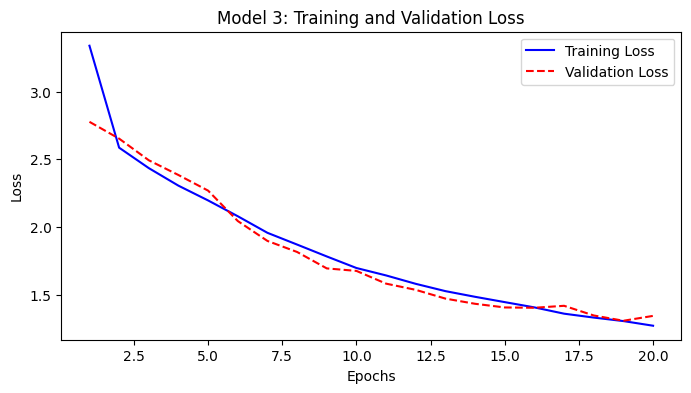

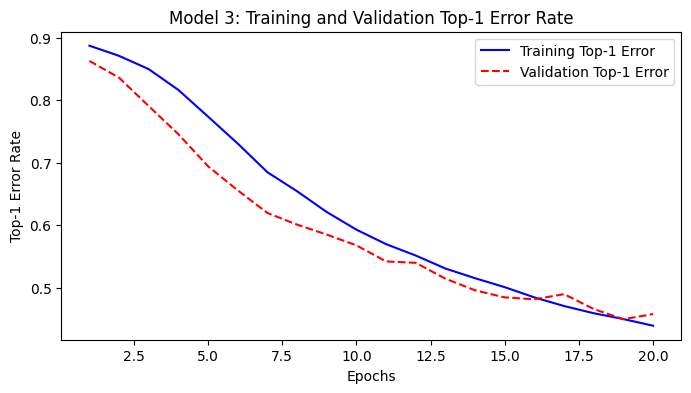

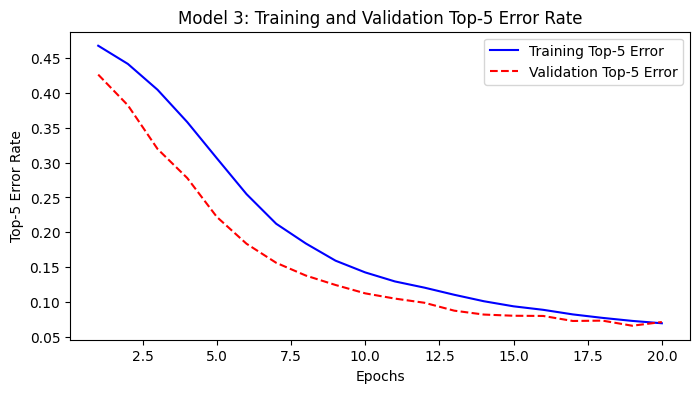

In [9]:
model_name = "Model 3"
epochs = 20
epoch_range = range(1, epochs + 1)

# converting accuracy to error rates:
train_top1_err_3 = [1 - acc for acc in history_3.history['accuracy']]
val_top1_err_3 = [1 - acc for acc in history_3.history['val_accuracy']]
train_top5_err_3 = [1 - acc if acc is not None else 1 for acc in history_3.history.get('top_5_acc', [None] * epochs)]
val_top5_err_3 = [1 - acc if acc is not None else 1 for acc in history_3.history.get('val_top_5_acc', [None] * epochs)]

# training and validation loss:
plt.figure(figsize=(8, 4))
plt.plot(epoch_range, history_3.history['loss'], 'b', label="Training Loss")
plt.plot(epoch_range, history_3.history['val_loss'], 'r', linestyle='dashed', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f"{model_name}: Training and Validation Loss")
plt.show()

# training and validation top-1 error rate:
plt.figure(figsize=(8, 4))
plt.plot(epoch_range, train_top1_err_3, 'b', label="Training Top-1 Error")
plt.plot(epoch_range, val_top1_err_3, 'r', linestyle='dashed', label="Validation Top-1 Error")
plt.xlabel("Epochs")
plt.ylabel("Top-1 Error Rate")
plt.legend()
plt.title(f"{model_name}: Training and Validation Top-1 Error Rate")
plt.show()

# training & validation top-5 error rate:
if any(train_top5_err_3) and any(val_top5_err_3):
    plt.figure(figsize=(8, 4))
    plt.plot(epoch_range, train_top5_err_3, 'b', label="Training Top-5 Error")
    plt.plot(epoch_range, val_top5_err_3, 'r', linestyle='dashed', label="Validation Top-5 Error")
    plt.xlabel("Epochs")
    plt.ylabel("Top-5 Error Rate")
    plt.legend()
    plt.title(f"{model_name}: Training and Validation Top-5 Error Rate")
    plt.show()



For model 3, both training and validation loss are decreasing and they are almost the exact same at the end, which means the model generalizes well.
At earlier epochs, validation loss fluctuates slightly, which might indicate that the model needed a few epochs to stabilize. This model is the best generalization so far. Model 3 also has the best top-1 and top-5 error rate so far, which means it has the highest classification accuracy and it ranks correct classes efficiently.

### **Conclusion:**

Model 3 achieved the best performance due to the balance between pre-trained feature retention and dataset-specific learning. Freezing only the first half of the network allowed the remaining layers to adapt to CIFAR-10 while still leveraging ImageNet knowledge. This resulted in the lowest Top-1 error (about 45%) and Top-5 error (about 8%), along with the highest validation accuracy (about 92%).

To prevent overfitting, we increased the dropout rate to 0.6, ensuring better generalization by reducing reliance on specific neurons. We used a small learning rate (0.000005) to fine-tune multiple layers carefully without overwriting pre-trained weights too quickly. The Global Average Pooling layer helped minimize trainable parameters, making the model more efficient. These choices resulted in a stable, well-generalized model with minimal overfitting and the best classification accuracy among all tested models.